In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('forestcover_pred.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


# EDA and Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
df.shape

(15120, 56)

In [6]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
# To remove the Id column

df.drop(['Id'], axis=1, inplace=True)
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


In [9]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,...,0.017055,0.049053,-0.009914,0.004767,-0.009244,0.033256,0.090648,0.047912,0.128467,-0.089389


# Feature Importance

[1.65657089e-01 4.95327563e-02 4.17786378e-02 5.88136509e-02
 4.92394924e-02 7.78669370e-02 4.84238055e-02 4.53572440e-02
 4.50822538e-02 6.63136150e-02 2.05109640e-02 3.67654446e-03
 1.77322971e-02 6.03826928e-02 2.43187445e-03 9.45562411e-03
 2.30948114e-02 1.62917364e-02 1.78577149e-03 3.63051512e-03
 0.00000000e+00 1.33082195e-05 1.96946729e-04 3.07516847e-02
 4.47116952e-03 6.23971456e-03 8.57184648e-03 2.12427098e-03
 0.00000000e+00 1.68358208e-03 1.00693913e-02 9.56969861e-04
 8.19606292e-04 2.18010321e-03 4.10751817e-04 7.90093364e-03
 6.96433515e-03 3.78207220e-03 3.61824713e-05 7.85967573e-04
 2.79628851e-04 1.96108685e-04 6.33247356e-03 1.10326450e-02
 3.55948710e-03 6.00985362e-03 4.62627101e-03 5.11807597e-04
 3.92552442e-03 1.98854181e-04 1.16697117e-03 2.76749583e-02
 2.37524171e-02 1.57158494e-02]


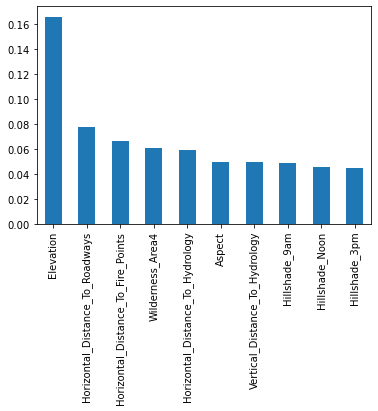

In [10]:
X = df.iloc[:,0:54]  #independent columns
y = df.iloc[:,-1]    #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

(55.5, -0.5)

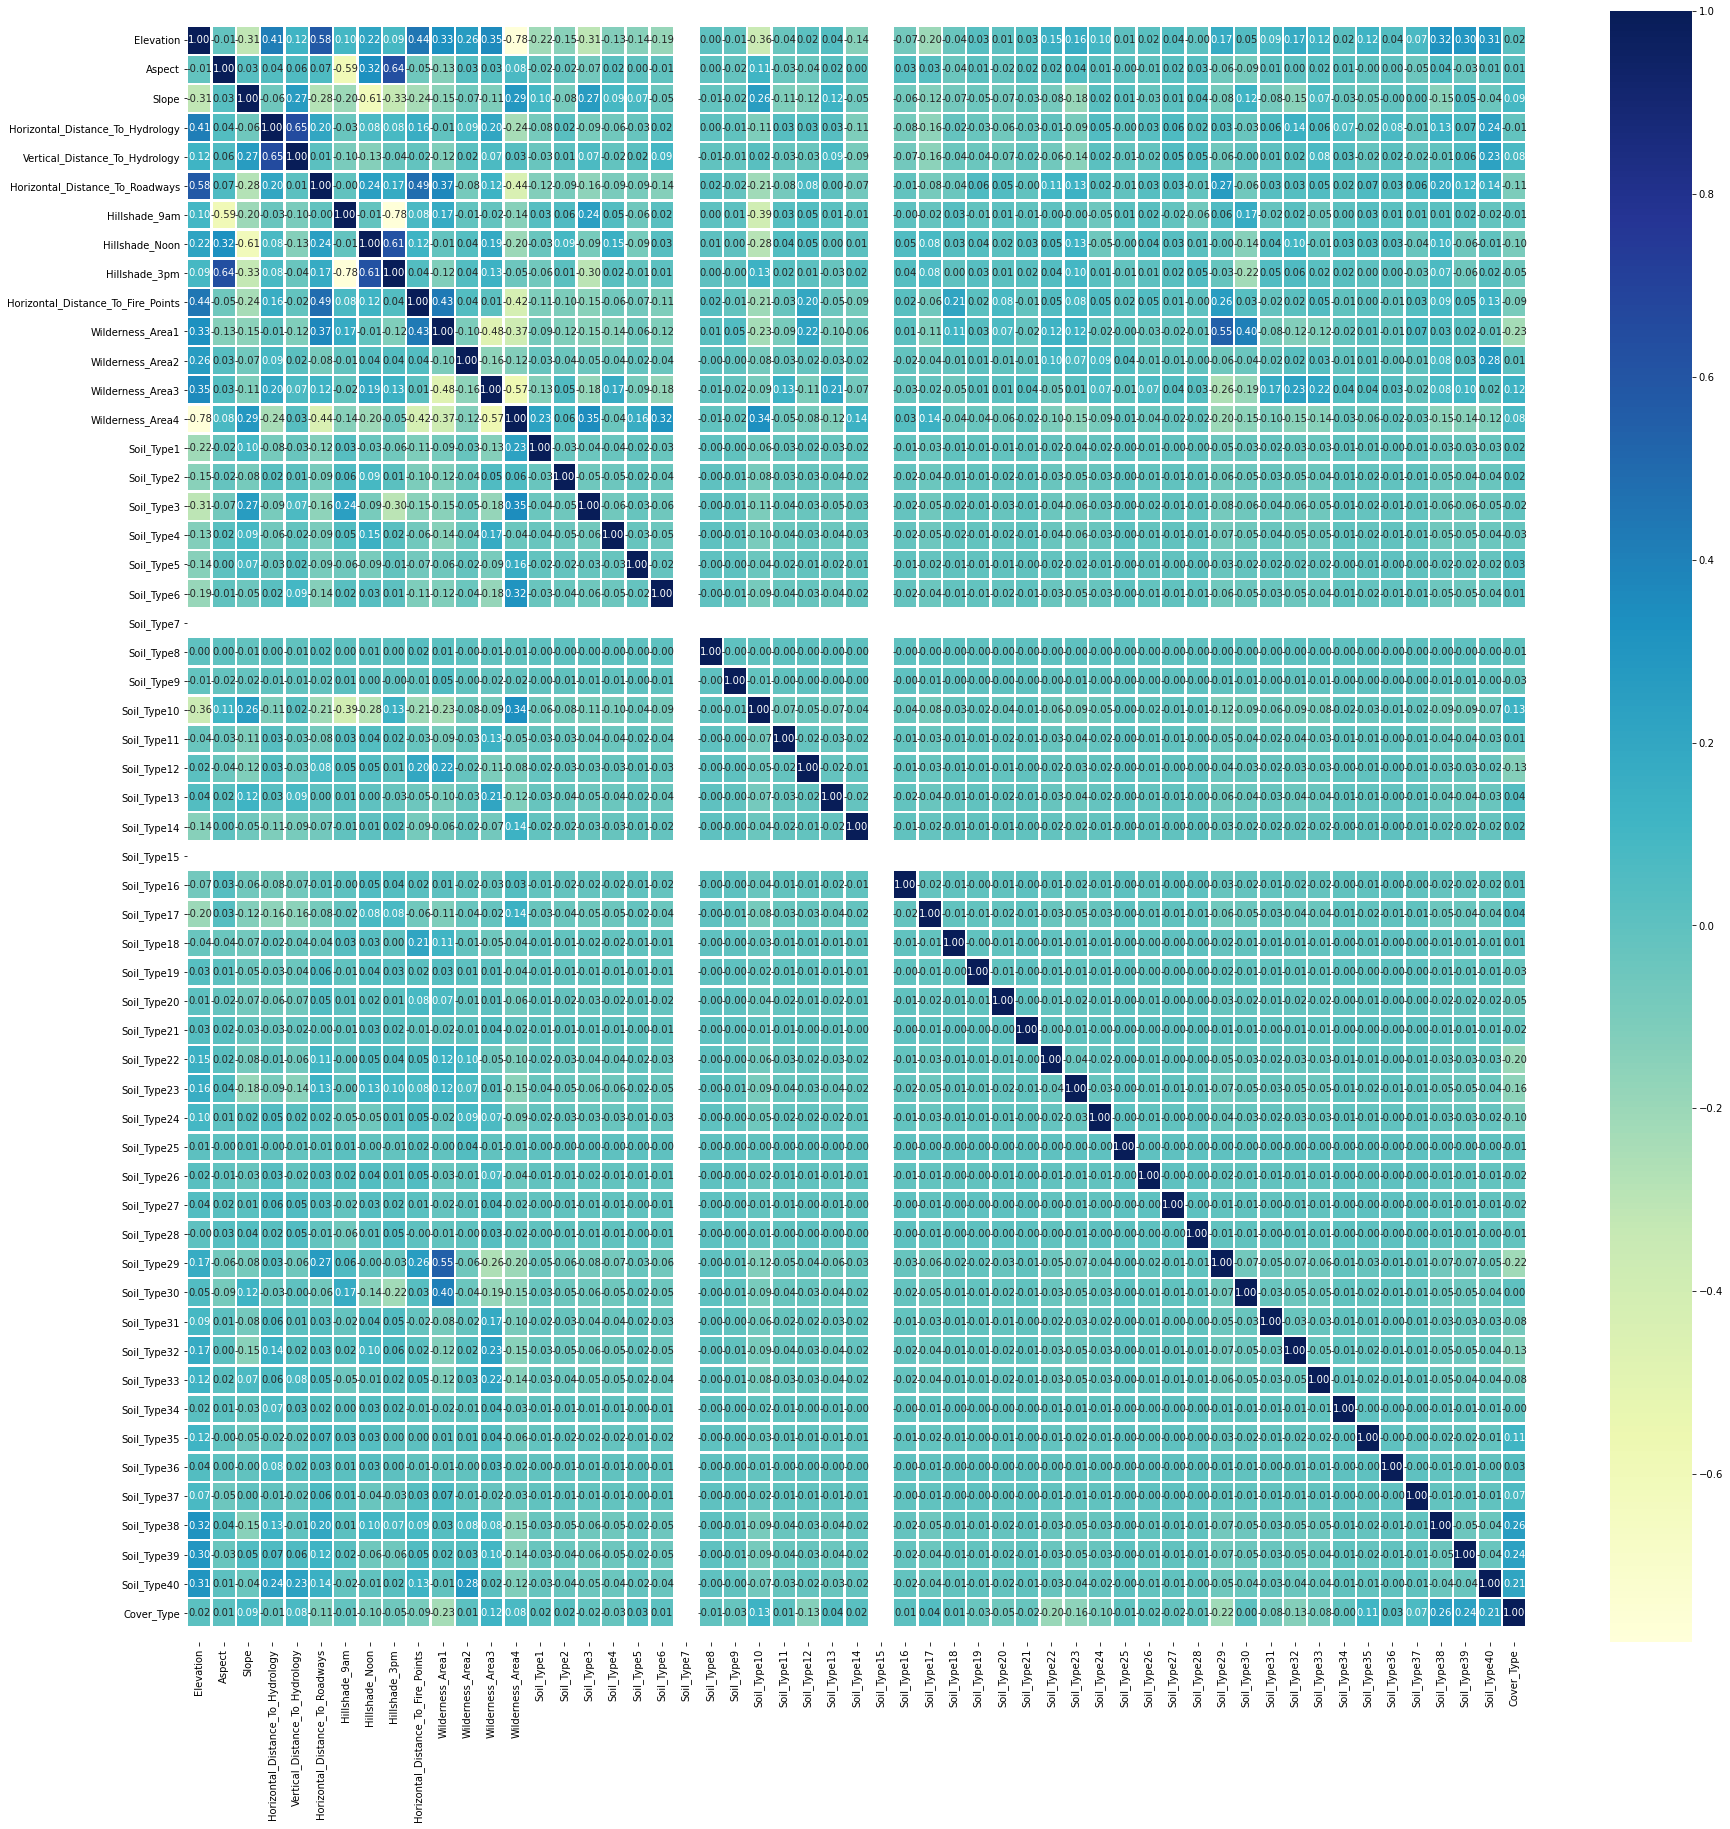

In [11]:
# Correlation of features using heatmap

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=1.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Count of each Cover_Type')

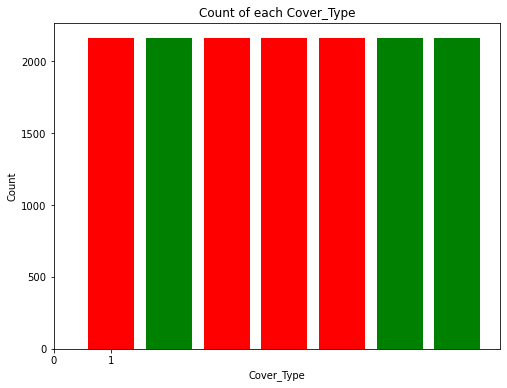

In [12]:
# Bar  plot for tagert

rcParams['figure.figsize'] = 8,6
plt.bar(df['Cover_Type'].unique(), df['Cover_Type'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.title('Count of each Cover_Type')

<AxesSubplot:title={'center':'Correlation with Cover_Type'}>

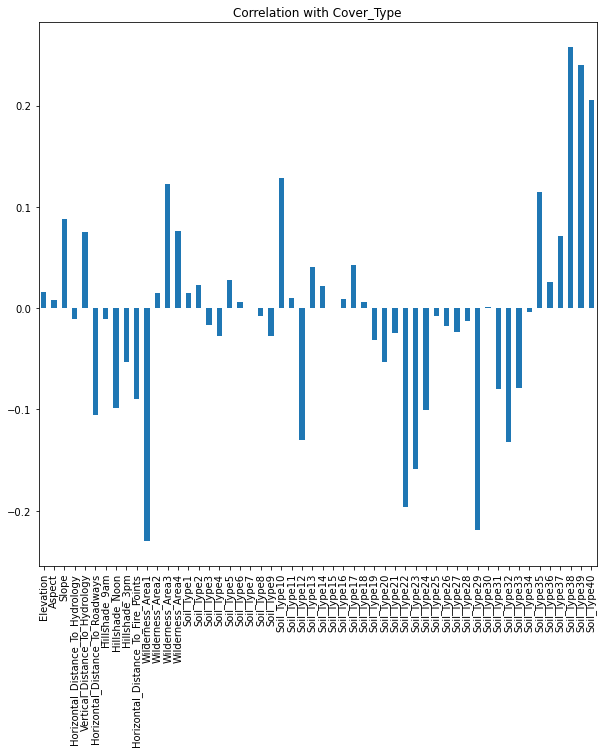

In [13]:
df.drop('Cover_Type', axis=1).corrwith(df.Cover_Type).plot(kind='bar', grid=False, figsize=(10, 10), title="Correlation with Cover_Type")

# SVM classifier

In [15]:
X = df.iloc[:, :-1]
y = df.Cover_Type

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.1)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

In [ ]:
pd.crosstab(y_test, y_predict)

In [ ]:
predictions = model.predict(X_test)
print(classification_report(y_test, y_predict))

# KNN classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
Score  = model.score(X_train,y_train)
Score

0.8721340388007055

In [59]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7976190476190477

In [51]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,329,98,2,0,36,0,55
2,128,289,29,0,83,25,6
3,0,5,398,44,6,83,0
4,0,0,10,529,0,13,0
5,3,5,15,0,503,1,0
6,0,5,56,26,8,436,0
7,19,4,0,0,0,0,531


In [ ]:
print (classification_report(y_test, y_predict))

# Decision Tree

In [80]:
# training a DescisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dtree_model = DecisionTreeClassifier(max_depth = 18, random_state = 53).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
accuracy_score(y_test, dtree_predictions)

0.7875661375661376

In [18]:
pd.crosstab(y_test, dtree_predictions)

col_0,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,348,112,0,0,16,1,43
2,136,327,17,1,58,12,9
3,2,7,390,27,8,102,0
4,0,0,18,521,0,13,0
5,9,36,12,0,465,5,0
6,5,9,75,19,13,410,0
7,39,3,1,0,0,0,511


In [ ]:
print (classification_report(y_test, dtree_predictions))

# Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
RF_model = RandomForestClassifier(max_depth = 18, random_state=12).fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
accuracy_score(y_test, RF_predictions)

0.8613756613756614

In [18]:
pd.crosstab(y_test, RF_predictions)

col_0,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,400,70,0,0,20,0,30
2,96,376,19,0,56,10,3
3,0,1,442,24,5,64,0
4,0,0,4,541,0,7,0
5,1,8,11,0,504,3,0
6,0,4,47,16,3,461,0
7,21,1,0,0,0,0,532


In [20]:
print (classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       520
           2       0.82      0.67      0.74       560
           3       0.85      0.82      0.83       536
           4       0.93      0.98      0.95       552
           5       0.86      0.96      0.90       527
           6       0.85      0.87      0.86       531
           7       0.94      0.96      0.95       554

    accuracy                           0.86      3780
   macro avg       0.86      0.86      0.86      3780
weighted avg       0.86      0.86      0.86      3780



# Xgboost

In [29]:
import xgboost as xgb

In [30]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier

In [41]:
xgb_model = XGBClassifier(objective='multi:softmax').fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
accuracy_score(y_test, xgb_predictions)

C:\Users\Ajitha A\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8552910052910053

# Adaboost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
Ab_model = AdaBoostClassifier(random_state = 50, learning_rate=0.6, algorithm="SAMME" ).fit(X_train, y_train)
Ab_predictions = Ab_model.predict(X_test)
accuracy_score(y_test, Ab_predictions)

0.5555555555555556